# example use of TabCorr from https://github.com/johannesulf/TabCorr

In [1]:
import numpy as np
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from halotools.sim_manager import CachedHaloCatalog
from halotools.mock_observables import wp
from halotools.empirical_models import PrebuiltHodModelFactory
from tabcorr import TabCorr

import time

In [2]:
time1 = time.time()

# First, we tabulate the correlation functions in the halo catalog.
rp_bins = np.logspace(-1, 1, 20)

halocat = CachedHaloCatalog(simname='bolplanck')
halotab = TabCorr.tabulate(halocat, wp, rp_bins, pi_max=40,
                           period=halocat.Lbox)

# We can save the result for later use.
halotab.write('bolplanck.hdf5')

# We could read it in like this. Thus, we can skip the previous steps in the
# future.
halotab = TabCorr.read('bolplanck.hdf5')

# Now, we're ready to calculate correlation functions for a specific model.
model = PrebuiltHodModelFactory('zheng07', threshold=-18)

print('{0} seconds'.format(time.time() - time1)) 

/Users/fardila/anaconda2/envs/baryonic_effects/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/fardila/anaconda2/envs/baryonic_effects/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


Number of tracer particles: 2670248
1592.1580250263214 seconds


/Users/fardila/anaconda2/envs/baryonic_effects/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


~ 25 minutes

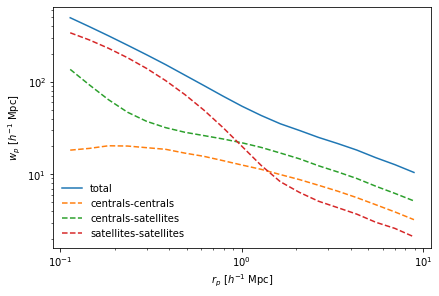

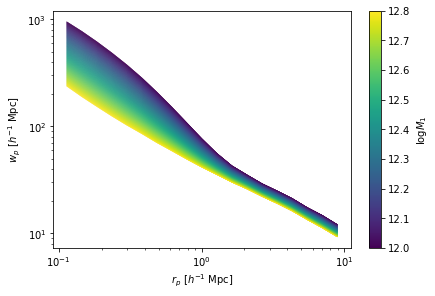

In [3]:
rp_ave = 0.5 * (rp_bins[1:] + rp_bins[:-1])

ngal, wp = halotab.predict(model)
plt.plot(rp_ave, wp, label='total')

ngal, wp = halotab.predict(model, separate_gal_type=True)

for key in wp.keys():
    plt.plot(rp_ave, wp[key], label=key, ls='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r_p \ [h^{-1} \ \mathrm{Mpc}]$')
plt.ylabel(r'$w_p \ [h^{-1} \ \mathrm{Mpc}]$')
plt.legend(loc='lower left', frameon=False)
plt.tight_layout(pad=0.3)
# plt.savefig('wp_decomposition.png', dpi=300)
plt.show()

# Studying how the clustering predictions change as a function of galaxy-halo
# parameters is straightforward.

norm = colors.Normalize(vmin=12.0, vmax=12.8)
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])

for logm1 in np.linspace(12.0, 12.8, 1000):
    model.param_dict['logM1'] = logm1
    ngal, wp = halotab.predict(model)
    plt.plot(rp_ave, wp, color=sm.to_rgba(logm1), lw=0.1)

cb = plt.colorbar(sm)
cb.set_label(r'$\log M_1$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r_p \ [h^{-1} \ \mathrm{Mpc}]$')
plt.ylabel(r'$w_p \ [h^{-1} \ \mathrm{Mpc}]$')
plt.tight_layout(pad=0.3)
# plt.savefig('wp_vs_logm1.png', dpi=300)
plt.show()